<a href="https://colab.research.google.com/github/sunon77/MLTransDyn/blob/master/MLP_002_Transformer_Exploare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## To demonstrate how overparameterization affects different types of machine learning models transformers vs. logistic regression

We'll use a simple dataset and compare two types of models: a transformer model (which typically handles overparameterization well) and a more traditional model (like a logistic regression, which can struggle with overparameterization)

In [17]:
! pip install accelerate -U

!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=66508381710885ac9541ced7664982bbc5335abac4ab01fbea15fbd95e98e4d5
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [1]:
import torch
import torch.nn.functional as F

In [2]:
from transformers import BertModel, BertTokenizer

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [5]:
# Tokenize input
text = "With shining eyes and slightly curled and full lips, she looks like a life-size Babi Doll."
encoded_input = tokenizer(text, return_tensors='pt')
encoded_input

{'input_ids': tensor([[  101,  2007,  9716,  2159,  1998,  3621,  8188,  1998,  2440,  2970,
          1010,  2016,  3504,  2066,  1037,  2166,  1011,  2946,  8670,  5638,
         10658,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [7]:
# Get embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# The embeddings of the sentence is the `last_hidden_state` of the output
embeddings = model_output.last_hidden_state
embeddings

tensor([[[ 0.2766, -0.1958, -0.3864,  ..., -0.2373,  0.3675,  0.2475],
         [ 0.9724,  0.3274, -0.4616,  ..., -0.2375,  0.2648,  0.2395],
         [ 0.4091, -0.0764,  0.1263,  ..., -0.3321,  0.8886,  0.2477],
         ...,
         [ 0.5943, -0.3292,  0.4498,  ..., -0.7926,  0.7312, -0.4325],
         [ 0.6318, -0.1535, -0.1578,  ..., -0.0822, -0.2771, -0.4957],
         [-0.0852,  0.2086, -0.4366,  ..., -0.2764,  0.5874, -0.6260]]])

In [12]:
# assume we have some tensor x with size (b, t, k) minibatch = 5, t words, each words with 100 dimensions
x = torch.rand(5, 10, 100)

print("Tensor shape:", x.shape)
print("Tensor transposed shape:", x.transpose(1, 2).shape)

Tensor shape: torch.Size([5, 10, 100])
Tensor transposed shape: torch.Size([5, 100, 10])


In [15]:

raw_weights = torch.bmm(x, x.transpose(1, 2))
# - torch.bmm is a batched matrix multiplication. It
#   applies matrix multiplication over batches of
#   matrices.

print("raw_weights shape:", raw_weights.shape)
raw_weights[0, :, :]

raw_weights shape: torch.Size([5, 10, 10])


tensor([[26.2599, 21.8901, 20.9016, 20.9866, 22.1947, 20.0502, 21.3490, 21.1638,
         23.7073, 19.9812],
        [21.8901, 34.9084, 26.0559, 25.3212, 27.4452, 26.9850, 26.3129, 25.2755,
         25.6226, 23.5927],
        [20.9016, 26.0559, 34.2037, 25.0761, 27.0788, 25.2344, 24.8910, 24.1350,
         24.7007, 22.9103],
        [20.9866, 25.3212, 25.0761, 31.9862, 25.8568, 24.0923, 22.7009, 25.5389,
         25.2548, 23.9654],
        [22.1947, 27.4452, 27.0788, 25.8568, 35.3893, 26.1052, 23.9062, 26.6146,
         27.9370, 24.1398],
        [20.0502, 26.9850, 25.2344, 24.0923, 26.1052, 32.7741, 24.4966, 24.2091,
         25.8778, 21.8597],
        [21.3490, 26.3129, 24.8910, 22.7009, 23.9062, 24.4966, 32.2441, 23.8036,
         24.7517, 20.2684],
        [21.1638, 25.2755, 24.1350, 25.5389, 26.6146, 24.2091, 23.8036, 34.6234,
         26.9470, 23.7760],
        [23.7073, 25.6226, 24.7007, 25.2548, 27.9370, 25.8778, 24.7517, 26.9470,
         32.7936, 23.9268],
        [19.9812, 2

In [16]:
weights = F.softmax(raw_weights, dim=2)
print("weights shape:", weights.shape)
weights[0, :, :]

weights shape: torch.Size([5, 10, 10])


tensor([[8.8113e-01, 1.1151e-02, 4.1495e-03, 4.5174e-03, 1.5120e-02, 1.7710e-03,
         6.4907e-03, 5.3932e-03, 6.8627e-02, 1.6529e-03],
        [2.2161e-06, 9.9850e-01, 1.4281e-04, 6.8497e-05, 5.7295e-04, 3.6164e-04,
         1.8467e-04, 6.5440e-05, 9.2593e-05, 1.2162e-05],
        [1.6684e-06, 2.8890e-04, 9.9845e-01, 1.0845e-04, 8.0354e-04, 1.2706e-04,
         9.0128e-05, 4.2316e-05, 7.4512e-05, 1.2435e-05],
        [1.6575e-05, 1.2645e-03, 9.8967e-04, 9.9203e-01, 2.1604e-03, 3.7002e-04,
         9.2034e-05, 1.5721e-03, 1.1834e-03, 3.2591e-04],
        [1.8577e-06, 3.5420e-04, 2.4555e-04, 7.2345e-05, 9.9848e-01, 9.2743e-05,
         1.0287e-05, 1.5436e-04, 5.7919e-04, 1.2993e-05],
        [2.9599e-06, 3.0411e-03, 5.2814e-04, 1.6855e-04, 1.2616e-03, 9.9353e-01,
         2.5253e-04, 1.8944e-04, 1.0050e-03, 1.8076e-05],
        [1.8460e-05, 2.6426e-03, 6.3752e-04, 7.1340e-05, 2.3812e-04, 4.2973e-04,
         9.9519e-01, 2.1490e-04, 5.5460e-04, 6.2648e-06],
        [1.4259e-06, 8.7056

In [18]:
y = torch.bmm(weights, x)

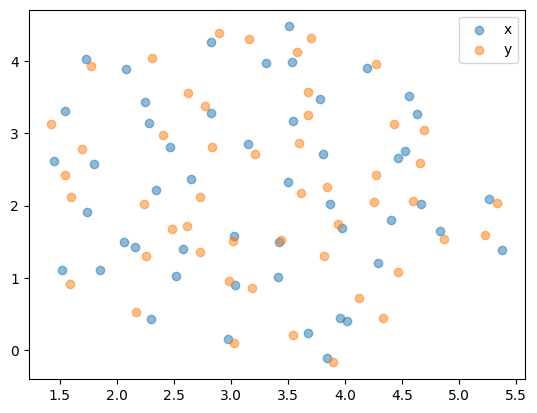

In [19]:
import umap
import matplotlib.pyplot as plt

# Reshape x and y to 2D
x_2d = x.view(x.shape[0]*x.shape[1], -1).numpy()
y_2d = y.view(y.shape[0]*y.shape[1], -1).numpy()

# Compute UMAP embeddings
umap_emb = umap.UMAP().fit_transform(np.concatenate([x_2d, y_2d]))

# Split the embeddings
x_umap = umap_emb[:x_2d.shape[0]]
y_umap = umap_emb[x_2d.shape[0]:]

# Plot UMAP embeddings
plt.scatter(x_umap[:, 0], x_umap[:, 1], label='x', alpha=0.5)
plt.scatter(y_umap[:, 0], y_umap[:, 1], label='y', alpha=0.5)
plt.legend()
plt.show()

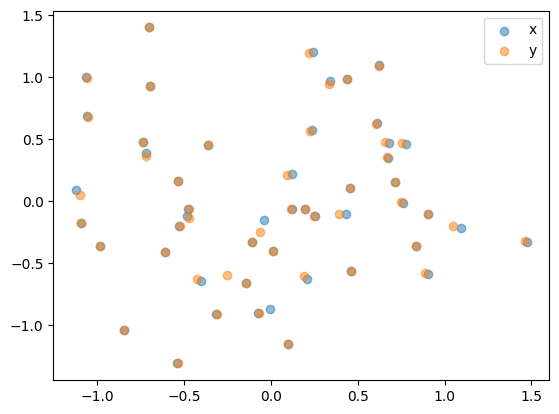

In [20]:
from sklearn.decomposition import PCA


# Reshape x and y to 2D
x_2d = x.view(x.shape[0]*x.shape[1], -1).detach().numpy()
y_2d = y.view(y.shape[0]*y.shape[1], -1).detach().numpy()

# Compute PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_2d)
y_pca = pca.transform(y_2d)

# Plot PCA
plt.scatter(x_pca[:, 0], x_pca[:, 1], label='x', alpha=0.5)
plt.scatter(y_pca[:, 0], y_pca[:, 1], label='y', alpha=0.5)
plt.legend()
plt.show()






1.   Implement multi-head self-attention mechanism.
2.   implement position-wise feedforward network
1.   Add potional encoding
2.   Construct encoder & decoder stacks.

Feed simple sentence to transfoerm & obtain the embedding vectors


Let's start with the code:

## Step 1: Implement multi-head self-attention mechanism

In [48]:
from torch import nn
import torch.nn.functional as F

class SelfAttention(nn.Module):
    def __init__(self, k, heads=4, mask=False):
        super().__init__()

        assert k % heads == 0

        self.k, self.heads = k, heads

        # These compute the queries, keys and values for all heads
        self.tokeys = nn.Linear(k, k, bias=False)
        self.toqueries = nn.Linear(k, k, bias=False)
        self.tovalues = nn.Linear(k, k, bias=False)

        # This will be applied after the multi-head self-attention operation.
        self.unifyheads = nn.Linear(k, k)

    def forward(self, x):
        b, t, k = x.size()
        h = self.heads

        s = k // h

        queries = self.toqueries(x).view(b, t, h, s)
        keys = self.tokeys(x).view(b, t, h, s)
        values = self.tovalues(x).view(b, t, h, s)

        # - fold heads into the batch dimension
        keys = keys.transpose(1, 2).contiguous().view(b * h, t, s)
        queries = queries.transpose(1, 2).contiguous().view(b * h, t, s)
        values = values.transpose(1, 2).contiguous().view(b * h, t, s)

        # Get dot product of queries and keys and scale
        dot = torch.bmm(queries, keys.transpose(1, 2))

        # scale the dot product
        dot = dot / (s **(1/2))

        # normalize
        dot = F.softmax(dot, dim=2)

        # - dot now contains row-wise normalized weights

        # apply the self attention to the values
        out = torch.bmm(dot, values).view(b, h, t, s)

        # swap h, t back, unify head
        out = out.transpose(1, 2).contiguous().view(b, t, h * s)

        return self.unifyheads(out)

        # dot product of the dot and values

        queries = queries / (h ** (1/4))
        keys = keys / (h ** (1/4))

# Step 2: Implement positiion-wise feedforward network

In [40]:
class TransformerBlock(nn.Module):
  def __init__(self, k, heads):
    super().__init__()

    self.attention = SelfAttention(k, heads=heads)

    self.norm1 = nn.LayerNorm(k)
    self.norm2 = nn.LayerNorm(k)

    # Feedforward network with topology k -> 4k -> k
    self.ff = nn.Sequential(
      nn.Linear(k, 4*k),
      nn.ReLU(),
      nn.Linear(4*k, k)
    )

  def forward(self, x):
    attended = self.attention(x)

    x = self.norm1(attended + x)

    fedforward = self.ff(x)

    return self.norm2(fedforward + x)

## Step 3: Build transformer with encoder stacks and a classifier

In [51]:
# Complete text classification transformer in pytorch

class Transformer(nn.Module):
  def __init__(self, k, heads, depth, seq_length, num_tokens, num_classes):
    super().__init__()

    # Transformer
    self.num_tokens = num_tokens
    self.token_embedding = nn.Embedding(num_tokens, k)
    self.pos_embedding = nn.Embedding(seq_length, k)

    # The sequence of transformer blocks that does all the heavy lifting
    tblocks = []
    for i in range(depth):
      tblocks.append(TransformerBlock(k=k, heads=heads))
    self.tblocks = nn.Sequential(*tblocks)

    # Final classifier to map the final output sequences to class logits
    self.toprobs = nn.Linear(k, num_classes)

  def forward(self, x):
    """
    x: A(b,t) atch_size x seq_length tensor of integeer values represent words (predetermined vocabulry)
    return: A(b,c) tensor of  log-probabilities over the classes (c is probability of class )
    """

    # Embed tokens and positions
    token = self.token_embedding(x)
    b, t, k = token.size()

    # Add the positional embedding to the token embedding
    pos = self.pos_embedding(torch.arange(t))
    x = token + pos

    x = self.tblocks(x)
    return x

    # Average pool over the t dimenions and project to class probabliite
    # x = x.mean(dim=1)

    # return F.log_softmax(self.toprobs(x), dim=1)



In [58]:
import unittest
from torch.autograd import Variable

class TestTransformer(unittest.TestCase):
    def setUp(self):
        self.transformer = Transformer(k=512, heads=8, depth=2, seq_length=10, num_tokens=10000, num_classes=2)
        self.vocab = {'<unk>': 0, 'the': 1, 'a': 2, 'in': 3, 'is': 4, 'to': 5, 'cat': 6, 'dog': 7}  # Example vocab

    def test_forward(self):
        sentence = "the cat is in the dog"
        # sentence = "I love roses"
        tokenized = [self.vocab.get(word, self.vocab['<unk>']) for word in sentence.split()]
        input_tensor = Variable(torch.Tensor([tokenized]).long())
        print(input_tensor)
        output = self.transformer(input_tensor)
        print(output)
        #self.assertEqual(output.shape, (1, 2))  # Check if the output shape is correct

In [59]:
# Evaluate the transformer
suite = unittest.TestLoader().loadTestsFromTestCase(TestTransformer)
unittest.TextTestRunner().run(suite)

.
----------------------------------------------------------------------
Ran 1 test in 0.187s

OK


tensor([[1, 6, 4, 3, 1, 7]])
tensor([[[-0.3068, -0.3502,  0.0455,  ..., -1.7299,  1.8882, -0.4151],
         [ 0.4346,  1.1519, -1.6140,  ..., -0.1031,  0.8126,  0.2797],
         [-0.9141,  1.1011, -0.2639,  ...,  1.4313,  0.6344,  0.2506],
         [ 1.5698, -0.8053,  1.9473,  ...,  0.8276, -1.1290, -2.2999],
         [-1.3754, -0.6954,  0.2719,  ..., -0.6818,  1.1503,  1.6634],
         [ 0.2461, -0.9765, -0.5570,  ...,  0.3161,  0.4530, -0.4717]]],
       grad_fn=<NativeLayerNormBackward0>)


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

In [28]:
#! pip install torchtext
! pip install portalocker

In [50]:
from torchtext.datasets import IMDB
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.functional import to_map_style_dataset
from torch.utils.data.dataset import random_split

# Define the tokenizer
tokenizer = get_tokenizer('basic_english')

# Load the IMDB dataset
train_iter, test_iter = IMDB()

# Create a vocabulary from the training data
vocab = build_vocab_from_iterator(map(tokenizer, map(lambda x: x[1], train_iter)), specials=['<unk>'])
vocab.set_default_index(vocab['<unk>'])

# Tokenize and numericalize the data
def encode(x):
    return torch.tensor([vocab[token] for token in tokenizer(x)])

train_iter = to_map_style_dataset(train_iter)
test_iter = to_map_style_dataset(test_iter)

for i in range(len(train_iter)):
    train_iter[i] = (encode(train_iter[i][1]), 1 if train_iter[i][0] == 'pos' else 0)

for i in range(len(test_iter)):
    test_iter[i] = (encode(test_iter[i][1]), 1 if test_iter[i][0] == 'pos' else 0)

# Split the training data into training and validation sets
train_size = int(0.8 * len(train_iter))
val_size = len(train_iter) - train_size
train_dataset, val_dataset = random_split(train_iter, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)



AttributeError: ignored

## Step 4: Evaluate and Compare (with slight modification for MLP)

In [ ]:
x